In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import data_utils
import model_utils
import model

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
data = data_utils.load_training_data()

In [16]:
# To get reasonable outputs, should use something bigger than 150 !
num_epochs = 150 

In [17]:
model_utils.reset_session_and_model()
with tf.Session() as sess:
    train_config = model.ModelConfig()
    test_config = model.ModelConfig()
    test_config.batch_size = 1
    test_config.num_steps = 1
    loader = data_utils.DataLoader(data=data,batch_size=train_config.batch_size, num_steps=train_config.num_steps)
    train_model = model.RNNModel(train_config, True)
    test_model = model.RNNModel(test_config, False)
    sess.run(tf.global_variables_initializer())
    for idx in range(num_epochs):
        epoch_loss = train_model.train_for_epoch(sess, loader)
        print(idx, ' ', epoch_loss)
    saver = tf.train.Saver()
    saver.save(sess, './models/rnnmodel.ckpt', global_step=num_epochs)
    sample_preds = test_model.predict(sess, seq_len=4000)


0   0.156879
1   0.0624695
2   0.0601051
3   0.057497
4   0.0547422
5   0.0539136
6   0.0525052
7   0.0518497
8   0.0513794
9   0.0511494
10   0.0510611
11   0.0510513
12   0.0511751
13   0.0510055
14   0.0507661
15   0.0506272
16   0.0505315
17   0.0503771
18   0.0499857
19   0.0494083
20   0.0490472
21   0.0494111
22   0.0488856
23   0.0488012
24   0.0486949
25   0.0486631
26   0.048608
27   0.0483866
28   0.0482026
29   0.0481025
30   0.0477992
31   0.0478462
32   0.0475438
33   0.0472591
34   0.0472552
35   0.0469012
36   0.0467713
37   0.0467124
38   0.0464514
39   0.0468302
40   0.0462916
41   0.0459995
42   0.0457915
43   0.0453434
44   0.0451813
45   0.045062
46   0.0448143
47   0.0449093
48   0.0444876
49   0.0440066
50   0.0441438
51   0.0434412
52   0.0433015
53   0.0436009
54   0.0437197
55   0.0431096
56   0.04276
57   0.0424592
58   0.0421468
59   0.0419956
60   0.0422894
61   0.0417198
62   0.0414417
63   0.0410982
64   0.0408435
65   0.0405319
66   0.0412885
67   0.0407

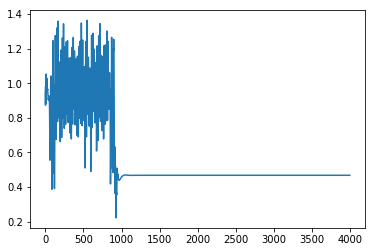

In [20]:
plt.plot(sample_preds)